In [1]:
import numpy as np
import cv2

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

In [2]:
img = cv2.imread('dualipa.jpg')
img_resized = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB) / 255.

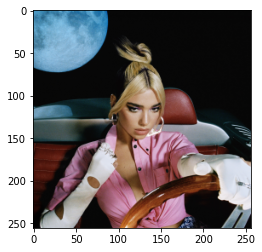

In [3]:
plt.imshow(img_rgb, cmap='hsv')

In [4]:
average = img_rgb.mean(axis=0).mean(axis=0)
print(average)

[0.32008799 0.28674765 0.29577158]


In [5]:
average_img = np.ones([100,100,3]) * average

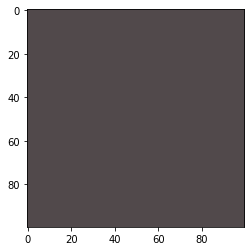

In [6]:
plt.imshow(average_img)

In [7]:
# def rgb_to_chroma(red, green, blue):
#     alpha = 0.5*(2*red - green - blue)
#     betha = (np.sqrt(3)/2)*(green - blue)

#     H2 = np.arctan2(betha, alpha)
#     G2 = np.sqrt(alpha**2 + betha**2)
#     I = (red + green + blue)/3
#     return H2, G2, I

# def polar_coord(x, y, z):
#     return np.cos(x)*y, np.sin(x)*y, z

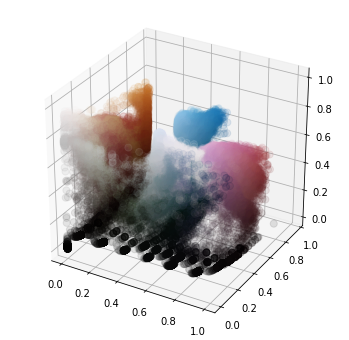

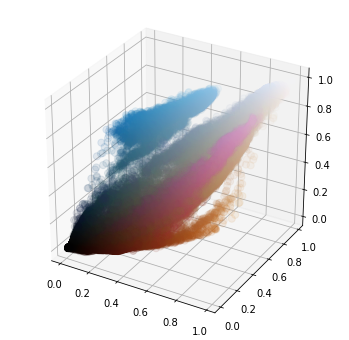

In [8]:
red = img_rgb[:,:,0].flatten()
green = img_rgb[:,:,1].flatten()
blue = img_rgb[:,:,2].flatten()
colors = list(zip(red, green, blue))

img_hsv = rgb_to_hsv(img_rgb)
H = img_hsv[:,:,0].flatten()
S = img_hsv[:,:,1].flatten()
V = img_hsv[:,:,2].flatten()

# fig = plt.figure(figsize=(6,6))
# ax = fig.add_subplot(111, polar=True)
# ax.scatter(H, S, color=colors, s=200, marker=".", cmap='hsv')

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(H, S, V, color=colors, s=200, marker=".", cmap='rgb', alpha=0.1)
plt.show()

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(red, green, blue, color=colors, s=200, marker=".", cmap='rgb', alpha=0.1)
plt.show()

In [9]:
from sklearn.cluster import KMeans

In [10]:
X_hsv = list(zip(H, S, V))
clusters_hsv = KMeans(n_clusters=8).fit(X_hsv)
clusters_rgb = hsv_to_rgb(clusters_hsv.cluster_centers_)
clusters_colors = list(zip(clusters_rgb.T[0], clusters_rgb.T[1], clusters_rgb.T[2]))
print(clusters_rgb)

[[0.10894179 0.11482063 0.13872332]
 [0.6184776  0.3755818  0.46530193]
 [0.34720188 0.16885216 0.10183954]
 [0.03227846 0.03177235 0.03174485]
 [0.71524195 0.71205139 0.78906711]
 [0.05521595 0.12580338 0.13599183]
 [0.6714392  0.5859321  0.48957638]
 [0.38052892 0.60909172 0.7500506 ]]


In [11]:
xs, ys, zs = (clusters_hsv.cluster_centers_.T[0], clusters_hsv.cluster_centers_.T[1], clusters_hsv.cluster_centers_.T[2])
# xs, ys, zs = np.sin(H2_cluster)*G2_cluster, np.cos(H2_cluster)*G2_cluster, I_cluster 

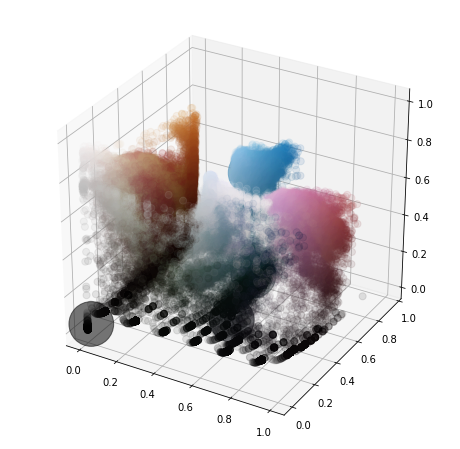

In [12]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(H, S, V, color=colors, s=200, marker=".", cmap='rgb', alpha=0.1)

ax.scatter(xs, ys, zs, color=clusters_colors, cmap='rgb', s=2000, marker="o")
plt.show()

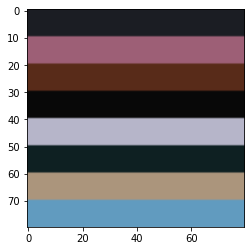

In [13]:
clusters_img = np.ones([80,80,3])
clusters_img[:10,:] = clusters_rgb[0]
clusters_img[10:20,:] = clusters_rgb[1]
clusters_img[20:30,:] = clusters_rgb[2]
clusters_img[30:40,:] = clusters_rgb[3]
clusters_img[40:50,:] = clusters_rgb[4]
clusters_img[50:60,:] = clusters_rgb[5]
clusters_img[60:70,:] = clusters_rgb[6]
clusters_img[70:80,:] = clusters_rgb[7]
plt.imshow(clusters_img)

In [14]:
def colorfulness(r, g, b):
    """Returns a colorfulness index of given RGB combination.
    Implementation of the colorfulness metric proposed by
    Hasler and Süsstrunk (2003) in https://infoscience.epfl.ch/
    record/33994/files/HaslerS03.pdf.
    Args:
        r (int): Red component.
        g (int): Green component.
        b (int): Blue component.
    Returns:
        float: Colorfulness metric.
    """
    rg = np.absolute(r - g)
    yb = np.absolute(0.5 * (r + g) - b)

    # Compute the mean and standard deviation of both `rg` and `yb`.
    rg_mean, rg_std = (np.mean(rg), np.std(rg))
    yb_mean, yb_std = (np.mean(yb), np.std(yb))

    # Combine the mean and standard deviations.
    std_root = np.sqrt((rg_std ** 2) + (yb_std ** 2))
    mean_root = np.sqrt((rg_mean ** 2) + (yb_mean ** 2))

    return std_root + (0.3 * mean_root)

In [15]:
clusters_rgb = sorted(clusters_rgb, key=lambda color: colorfulness(color[0], color[1], color[2]), reverse=True)
np.array([(i, colorfulness(color[0], color[1], color[2])) for i, color in enumerate(clusters_rgb)])

array([[0.00000000e+00, 1.02786038e-01],
       [1.00000000e+00, 7.34877692e-02],
       [2.00000000e+00, 7.11216110e-02],
       [3.00000000e+00, 4.89862901e-02],
       [4.00000000e+00, 2.51914479e-02],
       [5.00000000e+00, 2.26463680e-02],
       [6.00000000e+00, 8.24350323e-03],
       [7.00000000e+00, 1.73599498e-04]])

In [16]:
colorfulness_img = np.ones([512,512,3]) * (clusters_rgb[1]*0.7 + clusters_rgb[2]*0.3)
colorfulness_img[30:286,30:286] = img_rgb

averagecolor_img = np.ones([512,512,3]) * (average)
averagecolor_img[30:286,30:286] = img_rgb

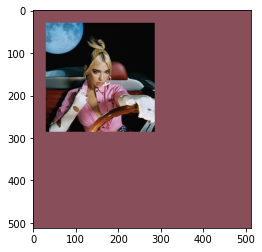

In [17]:
plt.imshow(colorfulness_img)

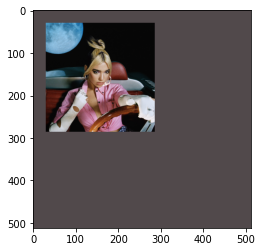

In [18]:
plt.imshow(averagecolor_img)

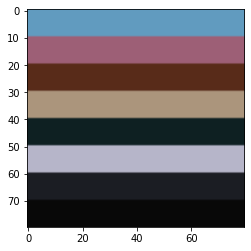

In [19]:
clusters_img = np.ones([80,80,3])
clusters_img[:10,:] = clusters_rgb[0]
clusters_img[10:20,:] = clusters_rgb[1]
clusters_img[20:30,:] = clusters_rgb[2]
clusters_img[30:40,:] = clusters_rgb[3]
clusters_img[40:50,:] = clusters_rgb[4]
clusters_img[50:60,:] = clusters_rgb[5]
clusters_img[60:70,:] = clusters_rgb[6]
clusters_img[70:80,:] = clusters_rgb[7]
plt.imshow(clusters_img)